In [75]:
# Necessary dependencies:
# Pandas, Numpy, Spacy

import pandas as pd 
import numpy
import matplotlib.pyplot as plt

# Clean clean clean 

emissions = pd.read_csv('shared_data_read_only/Agriculture Dataset.csv')

emissions.drop( emissions.index[emissions['Year'] != 2017], inplace=True )

emissions = emissions.iloc[: , 4:]
emissions.drop( columns=['Population', 'GDP  (2015 US$, mil)','Temperature change °C', 'Standard Deviation °C', 'Farm-gate emissions - Emissions (CO2eq) (AR5) - kilotonnes', 'Food Transport - Emissions (CO2eq) (AR5) - kilotonnes', 'Waste - Emissions (CO2eq) (AR5) - kilotonnes'],  inplace=True )

emissions.drop(list(emissions.filter(regex = 'intensity')), axis = 1, inplace = True)
emissions = emissions.dropna()

print( emissions )
print( len(emissions) )

       Cereals excluding rice-Emissions (CO2eq)-kilotonnes  \
2093                                          94759.8275     
2264                                          94603.8721     
5041                                          39402.8922     
11601                                        444593.3025     
11658                                         29003.3234     
11829                                          9602.3230     
12285                                        178554.9424     
12368                                         95353.9159     
12425                                         56943.7768     
12539                                         13072.4760     
12596                                         85991.4239     
12653                                         45430.0527     
13223                                         14219.5537     
13280                                         16400.2885     
13394                                         57357.9301     
13451   

In [80]:
temp = emissions.to_numpy()
temp = numpy.transpose(temp)
print(temp)
print(len(temp))
ecol = []

for i in range ( 0, len(emissions.columns), 2 ):
    em = temp[i]
    prod = temp[i+1]
    ecol.append ( numpy.divide(em, prod) )

emissions.drop(list(emissions.filter(regex = 'Production')), axis = 1, inplace = True)

ecoln = list(emissions.columns.values.tolist())

[[9.47598275e+04 9.46038721e+04 3.94028922e+04 4.44593302e+05
  2.90033234e+04 9.60232300e+03 1.78554942e+05 9.53539159e+04
  5.69437768e+04 1.30724760e+04 8.59914239e+04 4.54300527e+04
  1.42195537e+04 1.64002885e+04 5.73579301e+04 3.87577575e+04
  2.00569033e+05 2.44019501e+05]
 [4.02879728e+08 4.02707639e+08 1.45110000e+08 2.17961322e+09
  1.58318396e+08 3.70086050e+07 7.45126355e+08 4.06833938e+08
  2.10102481e+08 4.76887971e+07 4.97182139e+08 2.81832780e+08
  9.52787572e+07 1.08007398e+08 2.61843862e+08 1.67126833e+08
  1.05916111e+09 1.12039965e+09]
 [1.82667335e+04 1.80278478e+04 2.41756970e+03 5.18317619e+04
  3.48374990e+03 1.09100650e+03 3.07326831e+04 1.97247278e+04
  5.44261700e+03 1.43089480e+03 9.49345810e+03 5.43144260e+03
  3.44596040e+03 1.38334210e+03 6.42467440e+03 5.86811840e+03
  1.42769675e+04 3.75436840e+04]
 [3.13388560e+07 3.09630000e+07 4.84750000e+06 8.00885590e+07
  3.22703000e+06 1.44495000e+06 4.96901630e+07 3.47854390e+07
  7.13179800e+06 2.30753400e+06 1

In [100]:

means = dict()

for j in range ( len( ecol ))  :
    str = ecoln[j]
    print(j)
    mean =  ecol[j].mean() 
    means[ str ] = mean
  
# ah = []

# for pog in range (len(ecoln) ): 
#     str = ecoln [pog] 
#     ah.append() str [0: (len(str) - 29)]
    
    
dict(sorted(means.items(), key=lambda item: item[1]))
print(means)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
{'C': 0.00021671228955251186, '': 0.0011896873346965708, 'Milk, whole f': 0.001674476954592414, 'Milk,': 0.005936493789447837, 'M': 0.0025719097608296712}


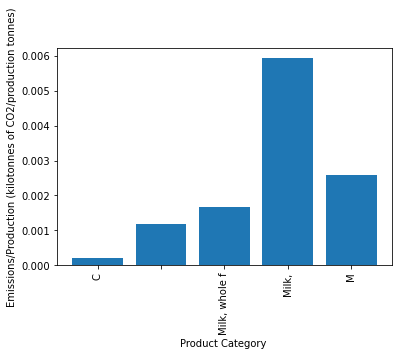

In [99]:
# make data:

names = list( means.keys() )
values = list( means.values() )

plt.bar(range(len(means)), values, tick_label=names)

plt.xticks(range(len(means.values())), means.keys(), rotation=90)
plt.xlabel('Product Category ')
plt.ylabel('Emissions/Production (kilotonnes of CO2/production tonnes)')
# plt.Axis.set_int()
plt.show()